# Scaling

In [1]:
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


Lets us the wine dataset to demonstrate scaling in feature engineering.

In [2]:


X, y = load_wine(return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

X_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,12.963306,2.402984,2.366613,19.500000,100.879032,2.273306,2.007339,0.364194,1.592984,4.974032,0.959323,2.600323,737.266129
std,0.841487,1.102317,0.271924,3.484134,15.367367,0.653762,1.010858,0.126607,0.581649,2.187782,0.233760,0.731616,304.705298
min,11.030000,0.890000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.290000,1.640000,2.217500,17.350000,88.000000,1.695000,1.172500,0.270000,1.247500,3.170000,0.780000,1.827500,498.750000
50%,12.945000,1.900000,2.360000,19.500000,98.000000,2.250000,2.125000,0.340000,1.555000,4.550000,0.975000,2.780000,666.000000
75%,13.695000,3.170000,2.522500,21.500000,108.500000,2.800000,2.807500,0.450000,1.952500,6.107500,1.120000,3.177500,924.250000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,10.800000,1.710000,4.000000,1547.000000


The featuers numeric range is quite spread. Some are beween 0 and 3, others between 200 and 1600.
Lets have a look at this dataset and plot everything agains everything to see what correlates with what and to get a feeling how everything is distributed.

In [3]:
# import seaborn as sns
# sns.displot(X)
# plt.show()

So we can see in that histogram that the data is allover the place. Lets also check what patterns we see in the data and plot everything agains everything


In [4]:
# sns.pairplot(X)
# plt.show()


## Classification model
Were gonna use a SVC (support vector machine classifier with the default RBF kernel that will already take away the need for polynomial feature creation).

In [5]:
unscaled_clf = DecisionTreeClassifier()
unscaled_clf.fit(X_train, y_train)
unscaled_y_pred = unscaled_clf.predict(X_test)
print(metrics.accuracy_score(y_test, unscaled_y_pred))
print(metrics.classification_report(y_test, unscaled_y_pred))

0.9629629629629629
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.91      1.00      0.95        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



.76 is not really exciting.

# Scaling
What happens if we scale all features to be somewhere around the same numeric range.

In [6]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler().set_output(transform="pandas")
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
138,0.647368,0.549898,0.443850,0.458763,0.195652,0.220690,0.029536,0.849057,0.145570,0.437086,0.268293,0.201465,0.237983
104,0.389474,0.171079,0.331551,0.510309,0.163043,0.420690,0.333333,0.358491,0.335443,0.132450,0.455285,0.842491,0.310481
78,0.342105,0.020367,0.315508,0.216495,0.717391,0.317241,0.318565,0.415094,0.740506,0.183223,0.471545,0.380952,0.371946
36,0.592105,0.152749,0.791444,0.252577,0.434783,0.558621,0.493671,0.396226,0.297468,0.315673,0.495935,0.553114,0.474389
93,0.331579,0.395112,0.459893,0.381443,0.195652,0.506897,0.402954,0.226415,0.496835,0.045254,0.544715,0.743590,0.009456
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.744737,0.126273,0.700535,0.742268,0.173913,0.679310,0.531646,0.150943,0.458861,0.181015,0.715447,0.692308,0.104019
106,0.321053,0.171079,0.406417,0.432990,0.108696,0.231034,0.356540,0.452830,0.382911,0.183223,0.422764,0.695971,0.182821
14,0.881579,0.199593,0.545455,0.072165,0.347826,0.800000,0.696203,0.301887,0.803797,0.635762,0.585366,0.633700,1.000000
92,0.436842,0.130346,0.481283,0.520619,0.108696,0.137931,0.236287,0.849057,0.379747,0.144592,0.390244,0.289377,0.171001


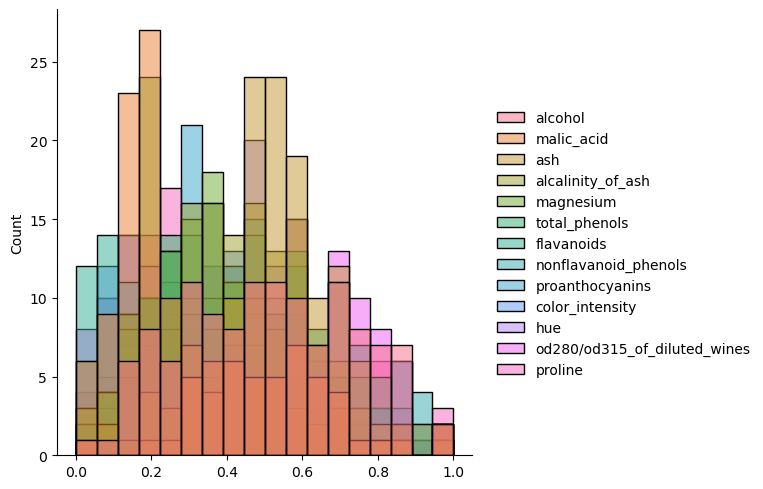

In [7]:
import seaborn as sns

sns.displot(scaled_X_train)
plt.show()

In [8]:


scaled_clf = DecisionTreeClassifier()
scaled_clf.fit(scaled_X_train, y_train)
scaled_y_pred = scaled_clf.predict(scaled_X_test)
print(metrics.accuracy_score(y_test, scaled_y_pred))
print(metrics.classification_report(y_test, scaled_y_pred))



0.9444444444444444
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.91      1.00      0.95        21
           2       1.00      0.93      0.96        14

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.95        54
weighted avg       0.95      0.94      0.94        54



**Exercise** *: Apply a min/max scaler instead.

**Exercise** **: Use another classifier on this problem. Do e.g. Decision Tree classifier suffer from the same problem?